/home/kaushik/Desktop/FinalInternship2024/dataset/models/500_350_250/GEM.root


/tmp/ipykernel_12251/1354710768.py:92: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot(x, pdf_fit, 'k-',color='blue', label='Fitted Polya Distribution')


16.86494053196984 2.2153339657256286 0.13135735412325678
/home/kaushik/Desktop/FinalInternship2024/dataset/models/1000_300_100/GEM.root
5.04448379725328 0.3435748395581325 0.06810901835886735
/home/kaushik/Desktop/FinalInternship2024/dataset/models/750_350_1000/GEM.root
18.058035804102627 7.131518688723134 0.3949221701677497
/home/kaushik/Desktop/FinalInternship2024/dataset/models/750_400_750/GEM.root
41.95026450335589 12.511979623405729 0.29825746682490667
/home/kaushik/Desktop/FinalInternship2024/dataset/models/750_500_500/GEM.root


KeyboardInterrupt: 

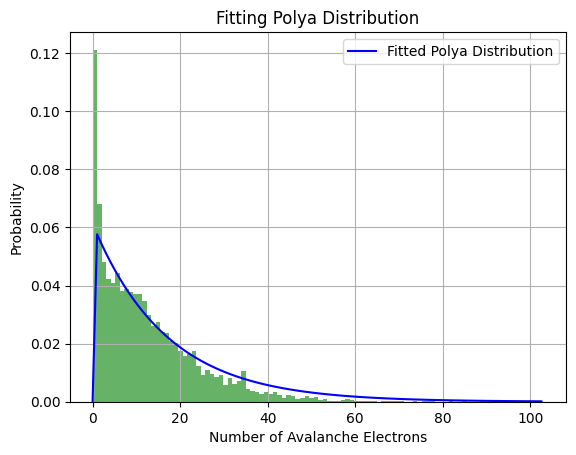

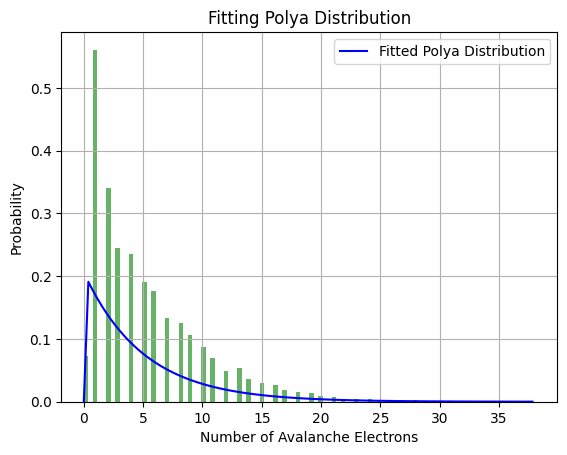

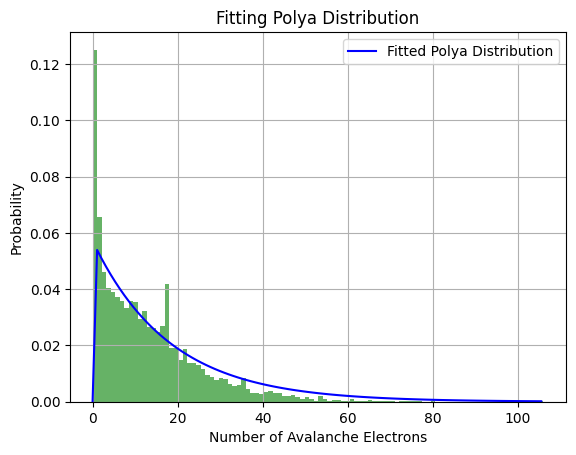

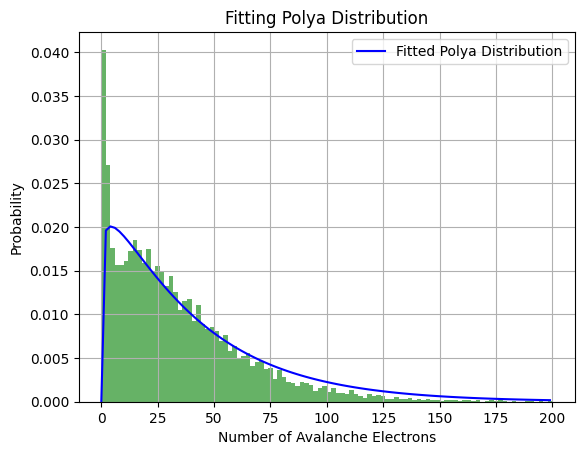

In [11]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import gamma
import glob
import os
# gem_file = r.TFile.Open("/home/kaushik/Desktop/FinalInternship2024/dataset/models/100_300_750/GEM.root")

gem_file = '/home/kaushik/Desktop/FinalInternship2024/dataset/models/*_*'
dir_list = glob.glob(gem_file)  

def polya(G,Go,m):
    return (((np.exp(-m*G/Go)) * m * ((m*G/Go)**(m-1))) / gamma(m))
def polya_2(G,Go,m):
    x = np.linspace(np.min(G),np.max(G),100)
    bin_width = x[1] - x[0] # =20
    polya_height = polya(G, Go, m)
    total_area = np.sum(polya_height * bin_width)
    polya_height = polya_height/total_area
    return polya_height

for dir_path in dir_list:
 
    # Define the pattern for the files within the current directory
    file_pattern = os.path.join(dir_path, '*')
    
    # Get all files in the current directory
    file_list = glob.glob(file_pattern) ## list of all the files in the directory
    # print(file_list)
    for file_path in file_list:
        lower_bounds = [2, 1]
        upper_bounds = [2000, 2.5]
        # print(file_path)
        # Extract the file name from the path (optional)
        file_name = os.path.basename(file_path)
        name_part = os.path.basename(os.path.dirname(file_path))
        if file_name == 'GEM.root':
            print(file_path)
            gem_file = r.TFile.Open(file_path)
            # print('Opening the file...')
            tree = gem_file.Get("Garfield;1")
            # print('Done!')
            # defining the variables

            avalanche_e = []
            detached_e_position_X = []
            detached_e_position_Y = []
            detached_e_position_Z = []

            # filling the variables
            
            for entry in tree:
                avalanche = getattr(entry,"numberOfAvalancheElectrons")
                for value in avalanche:
                    avalanche_e.append(value)
                    
                # position = getattr(entry,"initialElectronXpositions")
                # for value in position:
                #     detached_e_position_X.append(value) 
                    
                # position = getattr(entry,"initialElectronYpositions")
                # for value in position:
                #     detached_e_position_Y.append(value)
                
                position = getattr(entry,"finalElectronZpositions")
                for value in position:
                    detached_e_position_Z.append(value)
                    
                    
                effective_gain, eff_bin = np.histogram(detached_e_position_Z, bins=100, density=False)    
                effective_gain = np.array(effective_gain)
                eff_bin = np.array(eff_bin)
                effective_gain = 1 - (np.sum(effective_gain[0:40]) / np.sum(effective_gain))
                
                fig, ax = plt.subplots()
                count, bins, _ = ax.hist(avalanche_e, bins=100, density=True, alpha=0.6, color='g')
                count = np.array(count)
                bins = np.array(bins)
                count = count[1:]
                bins = bins[1:]
                bins = bins[1:] - (bins[1] - bins[0])/2
                bins = bins[count !=0]
                count = count[count !=0]
                
                params, cov = curve_fit(polya_2, bins, count, bounds=(lower_bounds, upper_bounds))
                gain_fit, m_fit = params
                x = np.linspace(0,np.max(bins),100)
                # x = np.linspace(np.min(bins),np.max(bins),100)
                pdf_fit = polya_2(x, gain_fit, m_fit)
                
                ax.plot(x, pdf_fit, 'k-',color='blue', label='Fitted Polya Distribution')

                ax.set_title('Fitting Polya Distribution')
                ax.set_xlabel('Number of Avalanche Electrons')
                ax.set_ylabel('Probability')
                ax.legend()
                ax.grid()
                # print('Done!')
                                
                
                print(gain_fit, gain_fit * effective_gain , effective_gain)
                # print(np.mean(np.array(avalanche_e)), np.std(np.array(avalanche_e)))
                ## analysis of the data
                # print('Done!') 
                # gem_file.Close() 
                # with open("data.txt","r+") as f:
                #     old = f.read()
                #     f.seek(0)
                #     f.write(f"{name_part} {gain_fit}\n{old}")

In [5]:
a = np.array([1,2,3,4,5])
b = np.sum(a[0:3])
b

6